In [51]:
import numpy as np
import matplotlib.pyplot as plt

class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.x_dim = x_dim
        self.y_dim = y_dim
        #  For each value in a sequence that runs y\x_dim times, place a 0 in a list.
        self.grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]
    
    def get_grid(self):
        # Implement a getter method for your grid.
        # simply returns the grid stored in the instance
        
        return self.grid
        

    def print_grid(self):
        # Implement a method to print out your grid in a human-readable format.
        for rows in self.grid:
            print(" | ".join(str(cell)for cell in rows)) 

    def populate_grid(self, coord):
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        for x,y in coord:
            if 0 <= x < self.x_dim and 0 <= y < self.y_dim:
                self.grid[x][y] = 1

    def make_step(self):
        new_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]  # Copy of the grid

        neighbours = [(-1,-1), (-1,0), (-1,1),
                  (0,-1),         (0, 1),
                  (1,-1), (1, 0), (1, 1)]

        for x in range(self.x_dim):
            for y in range(self.y_dim):
                count = 0
                for dx, dy in neighbours:
                    new_x, new_y = x + dx, y + dy
                    if 0 <= new_x < self.x_dim and 0 <= new_y < self.y_dim:
                        count += self.grid[new_x][new_y]

            # Apply Conway's rules
                if self.grid[x][y] == 1 and count in [2, 3]:
                    new_grid[x][y] = 1  # Live cell survives
                elif self.grid[x][y] == 0 and count == 3:
                    new_grid[x][y] = 1  # Dead cell becomes alive

        self.grid = new_grid  # Update the grid

    
    def make_n_steps(self, n):
        # Implement a method that applies the make_step method n times.
        for i in range(n):
            self.make_step()

    def draw_grid(self):
        grid_array = np.array(self.grid)  # Convert list to NumPy array
        plt.imshow(grid_array, cmap='binary')
        plt.title("Conway's Game of Life")
        plt.xlabel("Columns")
        plt.ylabel("Rows")
        plt.show()

In [53]:
game = GameOfLife(5, 5)  # Create a 5x5 grid


In [55]:
game.populate_grid([(1, 2), (2, 2), (3, 2)])

In [57]:
game.print_grid()

0 | 0 | 0 | 0 | 0
0 | 0 | 1 | 0 | 0
0 | 0 | 1 | 0 | 0
0 | 0 | 1 | 0 | 0
0 | 0 | 0 | 0 | 0


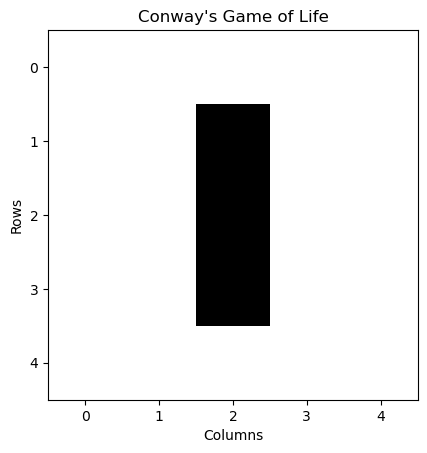

In [59]:
game.draw_grid()